In the reading on Total Survey Error by the Roper Center (https://ropercenter.cornell.edu/support/polling-fundamentals-total-survey-error/), there is a table of 95% confidence
intervals for sampling error in percentage values in survey results. This margin of error depends
on both the number of people surveyed (the sampling size) and the observed outcome for a
particular candidate (as a percentage). It turns out there is an error in this table.
1. Using the normal approximation to the binomial distribution, confirm that the 95%
confidence interval for the sampling error for sample size 1000 and percentage outcome
10% is 2% (rounded to the nearest integer).
2. Write a Python function for calculating the 95% confidence interval given any sample
size and any percentage outcome. Use your function to calculate all the values in the
Total Survey Error table rounded to the nearest integer. For which entries does your
margin of error differ from the value in the table?

In [1]:
#import necessary packages
import numpy as np
import scipy.stats as stats
import math

#use Normal approximation to Binomial distribution
#B(1000,0.10) ≈ N(100,90)

#determine the margin of error for sample size = 1000 and percentage outcome = 10%
margin = ((10*90)/1000)**0.5*1.96
print(margin)
print("Margin of error to nearest integer is " + str(round(margin))) 

1.859419264179007
Margin of error to nearest integer is 2


In [2]:
#create arrays of the information needed to determine margin of error
percentage = np.linspace(10,90,9)
sample_size = [1000,750,500,250,100]

#create an empty table to store calculations
table = [np.zeros(5)for i in range(0,9)]

#iterate through each element
for i in range(0,len(percentage)):
    for j in range(0,len(sample_size)):
        #use the calculation for margin or error
        table[i][j] = round(((percentage[i]*(100-percentage[i]))/sample_size[j])**0.5*1.96)

#show the data in the same format as the article
from tabulate import tabulate
print(tabulate(table,headers=["1,000","750","500","250","100"],showindex=["10","20","30","40","50","60","70","80","90"]))

      1,000    750    500    250    100
--  -------  -----  -----  -----  -----
10        2      2      3      4      6
20        2      3      4      5      8
30        3      3      4      6      9
40        3      4      4      6     10
50        3      4      4      6     10
60        3      4      4      6     10
70        3      3      4      6      9
80        2      3      4      5      8
90        2      2      3      4      6


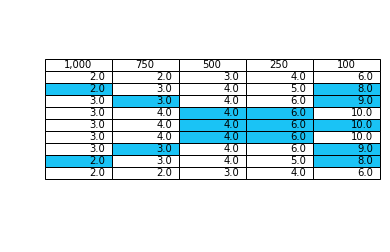

In [3]:
#import plotting package
import matplotlib.pyplot as plt
%matplotlib inline

#highlight where the differences occur in a table
colors = [["w","w","w","w","w"],[ "#1ac3f5","w","w","w","#1ac3f5"],["w","#1ac3f5","w","w","#1ac3f5"],["w","w","#1ac3f5","#1ac3f5","w"],["w","w","#1ac3f5","#1ac3f5","#1ac3f5"],["w","w","#1ac3f5","#1ac3f5","w"],["w","#1ac3f5","w","w","#1ac3f5"],["#1ac3f5","w","w","w","#1ac3f5"],["w","w","w","w","w"]]
fig, ax = plt.subplots()
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=table,cellColours=colors,
                     colLabels=["1,000","750","500","250","100"],loc='center')
plt.show()